In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

**Fazendo a leitura dos Datasets**

In [ ]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

In [ ]:
previsores.shape

(569, 30)

**Fazendo a divisão da base de dados em treinamento e teste**

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

**Criação da rede neural**

In [ ]:
#Sequential == classe utilizada para criação da rede neural

classificador = Sequential()

**Adicionando uma camada oculta**

In [ ]:
# Dense == Camadas densas da rede neural, ou seja, cada neurônio é ligado com todos os outros neurônios da camada subsequente.
# units == Quantos neurônios farão parte da minha camada oculta (números de entradas + numeros de saídas / 2)
# activation == função de ativação que sera inserida (relu, sigmoid, etc)
# kernel_initializer == Como será feita a inicialização dos pesos
# imput_dim = Quantos elementos existem na camada de entrada (cadastrar somente na primeira camada oculta)

classificador.add(Dense(
                        units=16,
                        activation='relu',
                        kernel_initializer='random_uniform',
                        input_dim=30))

**Adicionando mais uma camada oculta**

In [ ]:
classificador.add(Dense(
                        units=16,
                        activation='relu',
                        kernel_initializer='random_uniform'))

**Adicionando a camada de saída**

In [ ]:
classificador.add(Dense(
    units=1,
    activation='sigmoid'
))

**Compilando a rede neural**

In [ ]:
# optimizer == Qual a função que será utilizada para fazer o ajuste dos pesos
# loss == Função de perda (realização do cálculo de erro)
# metrics == métrica que será utilizada para fazer a avaliação

classificador.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

**Iniciando o treinamento da rede neural**

In [ ]:
# fit == Encaixar as features para realizar o treinamento
# batch_size == De quantos em quantos registros os pesos serão atualizados
# epochs = quantas vezes os pesos serão ajustados

classificador.fit(
    previsores_treinamento,
    classe_treinamento,
    batch_size=2,
    epochs=200
)

Epoch 1/200
213/213 [==============================] - 1s 2ms/step - loss: 0.7067 - binary_accuracy: 0.6315
Epoch 2/200
213/213 [==============================] - 0s 2ms/step - loss: 0.4832 - binary_accuracy: 0.7512
Epoch 3/200
213/213 [==============================] - 0s 1ms/step - loss: 0.4026 - binary_accuracy: 0.8169
Epoch 4/200
213/213 [==============================] - 0s 2ms/step - loss: 0.4211 - binary_accuracy: 0.8005
Epoch 5/200
213/213 [==============================] - 0s 2ms/step - loss: 0.3493 - binary_accuracy: 0.8592
Epoch 6/200
213/213 [==============================] - 0s 1ms/step - loss: 0.3263 - binary_accuracy: 0.8592
Epoch 7/200
213/213 [==============================] - 0s 2ms/step - loss: 0.3042 - binary_accuracy: 0.8779
Epoch 8/200
213/213 [==============================] - 0s 1ms/step - loss: 0.2980 - binary_accuracy: 0.8803
Epoch 9/200
213/213 [==============================] - 0s 2ms/step - loss: 0.2807 - binary_accuracy: 0.8897
Epoch 10/200
213/213 [======

**Testando a rede neural**

In [ ]:
previsoes = classificador.predict(previsores_teste)


**Transformando os valores 0 e 1 para True e False.**

In [ ]:
previsoes = (previsoes > 0.5)


**Comparando os vetores para medir o acerto**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

precisao = accuracy_score(classe_teste, previsoes)

print(precisao)

matriz = confusion_matrix(classe_teste, previsoes)

print(matriz)

0.8181818181818182
[[50  6]
 [20 67]]


**Comparante usando o recurso do Keras**

In [ ]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
print(resultado)

5/5 [==============================] - 0s 2ms/step - loss: 0.8809 - binary_accuracy: 0.8182
[0.8809029459953308, 0.8181818127632141]


Text(33.0, 0.5, 'Actual')

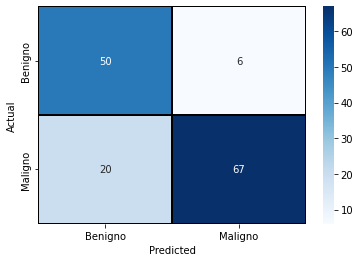

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#confusion matrix
plt.figure(figsize = (6,4))
cm = confusion_matrix(classe_teste, previsoes)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Benigno','Maligno'] , yticklabels = ['Benigno','Maligno'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
FP = matriz.sum(axis=0) - np.diag(matriz)  
FN = matriz.sum(axis=1) - np.diag(matriz)
TP = np.diag(matriz)
TN = matriz.sum() - (FP + FN + TP)

print(f'FP: {FP}\n\nFN: {FN}\n\nTP: {TP}\n\nTN: {TN}')

FP: [20  6]

FN: [ 6 20]

TP: [50 67]

TN: [67 50]


In [ ]:
Recall = recall_score(classe_teste, previsoes, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
Recall

0.8314860426929392

In [ ]:
sensitivity = TP[0]/(TP[0]+FN[0])
sensitivity

0.8928571428571429

In [ ]:
specificity = TN[0]/(TN[0]+FP[0])
specificity

0.7701149425287356